# First analysis

This file aims to answers our first sub-questions for Milestone 1 of the project.

We will explore each question, and verify if we can answeer them using the data set

## 0) Importing the packages and data 

In [44]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")
import math

In [45]:
df_movie = pd.read_csv('../Datasets/movies_cleaned_dataset.csv')
df_movie.head()

,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_genres,Main_genre,Main_language,Top_genres,Main_country,Main_continent,Plot_summary,...,averageRating,numVotes,Estimated_Budget,IMDb,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,nconst,Director_name
0,Ghosts of Mars,14010832,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","['Thriller', 'Science Fiction', 'Horror', 'Adv...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",...,4.9,56894.0,28000000,tt0228333,0,0,-13989168,-1.870336e+07,nm0000118,John Carpenter
1,White Of The Eye,0,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","['Thriller', 'Erotic thriller', 'Psychological...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,...,6.1,2894.0,0,tt0094320,0,0,0,0.000000e+00,nm0131910,Donald Cammell
2,A Woman in Flames,0,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",...,5.9,623.0,0,tt0083949,0,0,0,0.000000e+00,nm0885554,Robert van Ackeren
3,The Sorcerer's Apprentice,0,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","['Family Film', 'Fantasy', 'Adventure', 'World...",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",...,NaN,NaN,0,NaN,0,0,0,0.000000e+00,NaN,Unknown
4,Little city,0,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","['Romantic comedy', 'Ensemble Film', 'Comedy-d...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",...,5.8,1129.0,0,tt0119548,0,0,0,0.000000e+00,nm0070142,Roberto Benabib


## 1) How do rating and revenue vary as a function of the genre?

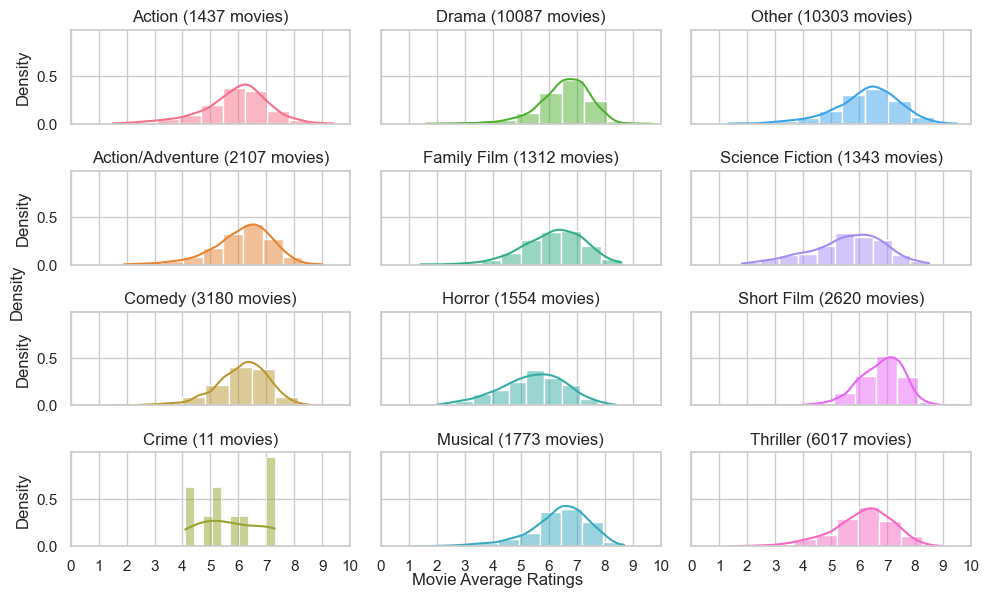

In [46]:
# Calculate stats by genre and normalize by the number of movies
stats_by_genre = df_movie.groupby('Top_genres').apply(lambda x: pd.Series({
    'rating': x['averageRating'].values,
    'num_movies': len(x)
}))

# Create subplots with Seaborn for better aesthetics
fig, ax = plt.subplots(4, 3, figsize=(10, 6), sharey=True, sharex=True)

# Define a color palette for each genre
palette = sns.color_palette("husl", n_colors=len(stats_by_genre))

for i, (genre, data) in enumerate(stats_by_genre.iterrows()):
    sbplt = ax[i % 4, math.floor(i / 4)]
    
    # Histogram with normalization by the number of movies and different colors for each genre
    sns.histplot(data['rating'], bins=10, kde=True, ax=sbplt, stat='density', color=palette[i])
    
    sbplt.set_title(f'{genre} ({data["num_movies"]} movies)')
    sbplt.set_xlim(0, 10)  # Set x-axis limits
    
    # Add x-axis values on all scores
    x_ticks = [tick for tick in range(11)]
    sbplt.set_xticks(x_ticks)

fig.tight_layout()

# Set overall labels
fig.text(0.5, 0.02, "Movie Average Ratings", ha='center', va='center')
fig.text(0.02, 0.5, "Density", ha='center', va='center', rotation='vertical')

plt.show()


## 2) Which relation between the screen time and the opportunity to win an award ?

We first consider all the movies who were nominated at the Oscar ceremony : we have 674 nominated movies. Several movies can be nominated, and there exist several categories of Oscar awards.

- The average screan time is 121 minutes. 
- We also observe that the mean release year is 1974.

In [ ]:
# deleting extreme outliers for movie runtime
df_movie = df_movie[df_movie['Movie_runtime'] < 300] # 300 minutes is 5 hours

In [ ]:
df_movie[df_movie['Nominations'] != 0].describe()

,Movie_box_office_revenue,Movie_runtime,Release_Date,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit
count,6.950000e+02,695.000000,695.000000,676.000000,6.760000e+02,6.950000e+02,695.000000,695.000000,6.950000e+02,6.950000e+02
mean,9.335208e+07,116.831799,1974.099281,7.406065,1.830885e+05,1.683873e+07,1.884892,4.716547,7.651335e+07,1.750133e+08
std,2.113991e+08,34.121362,23.102395,0.612106,3.531700e+05,3.560136e+07,1.695388,3.251504,1.876706e+08,4.743071e+08
min,0.000000e+00,5.000000,1934.000000,5.100000,8.500000e+01,0.000000e+00,0.000000,1.000000,-2.000000e+08,-2.348670e+08
25%,0.000000e+00,102.000000,1953.500000,7.000000,9.050000e+03,0.000000e+00,1.000000,2.000000,0.000000e+00,0.000000e+00
50%,1.304646e+07,116.000000,1975.000000,7.500000,4.029300e+04,2.000000e+06,1.000000,4.000000,8.350205e+06,4.317011e+07
75%,8.927260e+07,130.000000,1994.000000,7.800000,1.885272e+05,1.500000e+07,2.000000,7.000000,6.797294e+07,1.835972e+08
max,2.782275e+09,250.000000,2012.000000,9.200000,2.797575e+06,2.370000e+08,11.000000,14.000000,2.545275e+09,6.822472e+09


We can also vizualise the number of awarded movies compared to the runtime

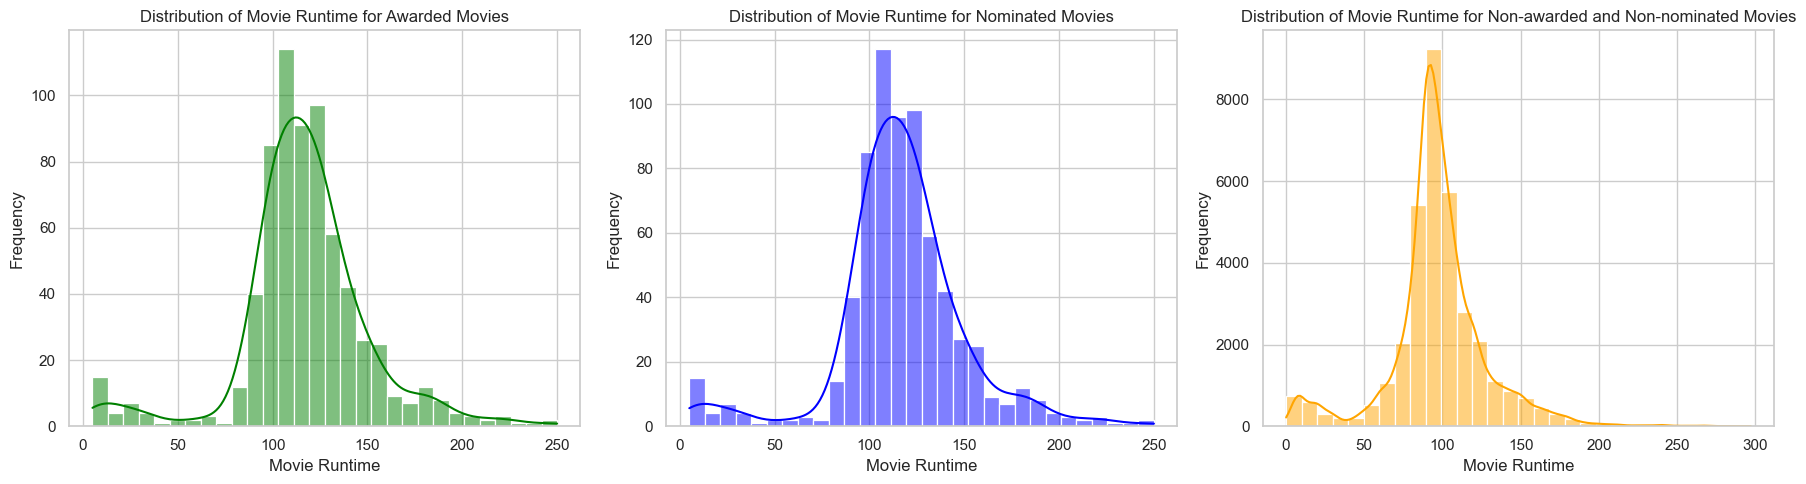

In [ ]:
df_movie['Was_nominated'] = df_movie['Nominations'].apply(lambda x: 'Nominated' if x > 0 else 'Not Nominated')
df_movie['Was_awarded'] = df_movie['Oscar_Wins'].apply(lambda x: 'Awarded' if x > 0 else 'Not Awarded')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot for Awarded Movies
sns.histplot(data=df_movie[df_movie['Was_awarded'] == 'Awarded'], x='Movie_runtime', bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Movie Runtime for Awarded Movies')
axes[0].set_xlabel('Movie Runtime')
axes[0].set_ylabel('Frequency')

# Plot for Nominated Movies
sns.histplot(data=df_movie[df_movie['Was_nominated'] == 'Nominated'], x='Movie_runtime', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution of Movie Runtime for Nominated Movies')
axes[1].set_xlabel('Movie Runtime')
axes[1].set_ylabel('Frequency')

# Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie[(df_movie['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.histplot(data=non_awarded_nominated_movies, x='Movie_runtime', bins=30, kde=True, color='orange', ax=axes[2])
axes[2].set_title('Distribution of Movie Runtime for Non-awarded and Non-nominated Movies')
axes[2].set_xlabel('Movie Runtime')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


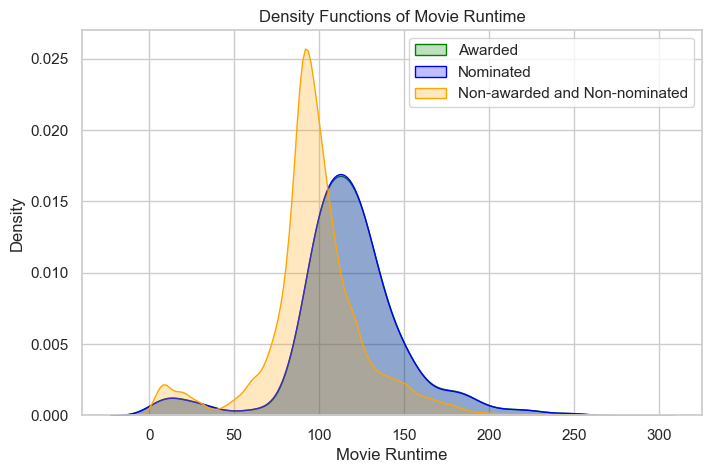

In [ ]:
plt.figure(figsize=(8, 5))
# KDE Plot for Awarded Movies
sns.kdeplot(data=df_movie[df_movie['Was_awarded'] == 'Awarded'], x='Movie_runtime', fill=True, label='Awarded', color='green')
# KDE Plot for Nominated Movies
sns.kdeplot(data=df_movie[df_movie['Was_nominated'] == 'Nominated'], x='Movie_runtime', fill=True, label='Nominated', color='blue')
# KDE Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie[(df_movie['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.kdeplot(data=non_awarded_nominated_movies, x='Movie_runtime', fill=True, label='Non-awarded and Non-nominated', color='orange')

# Set plot title and labels
plt.title('Density Functions of Movie Runtime', fontsize=12)
plt.xlabel('Movie Runtime')
plt.ylabel('Density')
plt.legend()
plt.show()


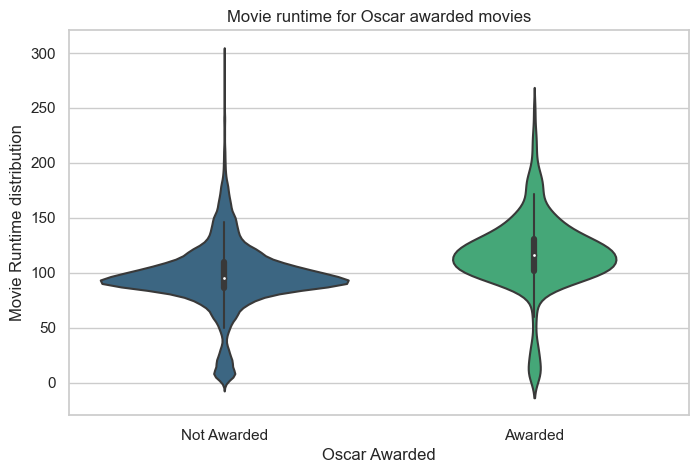

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Was_awarded', y='Movie_runtime', data=df_movie, palette='viridis')
plt.title('Movie runtime for Oscar awarded movies')
plt.ylabel('Movie Runtime distribution')
plt.xlabel('Oscar Awarded')
plt.show()

We can then use a linear regression between the number of nominations and the movie runtime

This driver seems not significant at all: $p_{value} =  0.985$

In [ ]:
mod1 = smf.ols(formula='Nominations ~ Movie_runtime ', data=df_movie)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:            Nominations   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     472.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          5.14e-104
Time:                        17:20:01   Log-Likelihood:                -42030.
No. Observations:               35486   AIC:                         8.406e+04
Df Residuals:                   35484   BIC:                         8.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1902      0.014    -13.920

Oscar Awarded movies seem to be quite long : the mean and mediane  are around 120 minutes, which is 2h. 

In [ ]:
df_movie.Movie_runtime.describe()

count    35486.000000
mean        97.360676
std         31.433320
min          0.300000
25%         86.000000
50%         96.000000
75%        110.000000
max        297.000000
Name: Movie_runtime, dtype: float64

## 3) What is the relation between being awarded and revenues

We have box office revenue data for  7502 movies.


/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_15021/2672414047.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


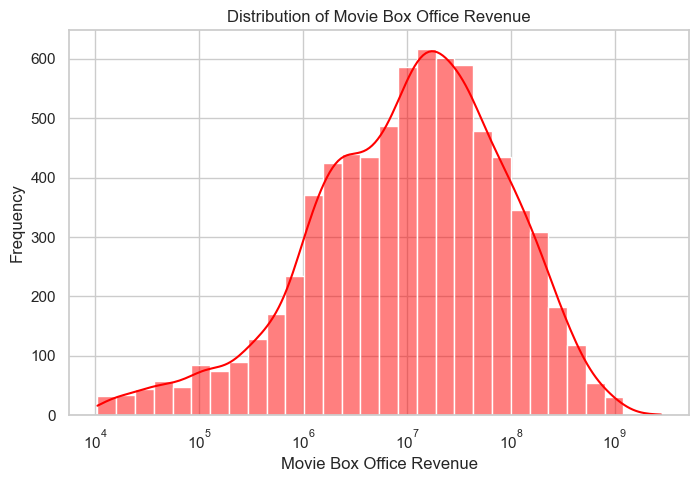

In [ ]:
df_movie_revenues = df_movie[df_movie['Movie_box_office_revenue'] != 0]
print("We have box office revenue data for ",len(df_movie_revenues),"movies.")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_movie_revenues, x='Movie_box_office_revenue', bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribution of Movie Box Office Revenue')
plt.xlabel('Movie Box Office Revenue')
plt.ylabel('Frequency')
fig.show()

We have inflation adjusted data for  6342 movies.


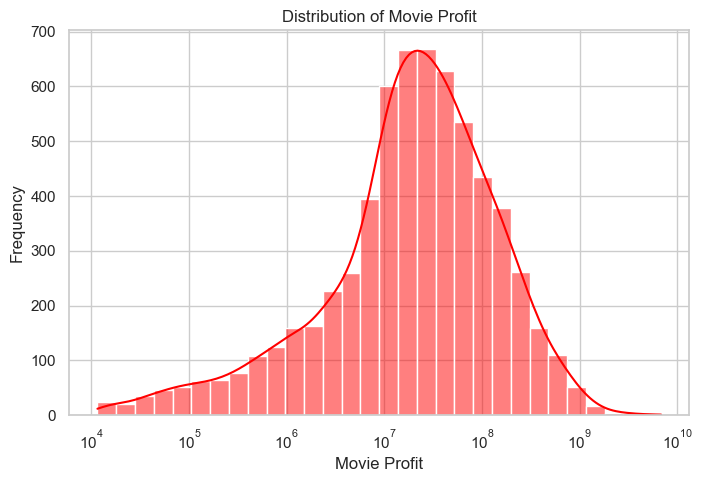

In [ ]:
df_movie_profit = df_movie[df_movie['Inflation_adjusted_profit'] > 10000] # 10000 is the minimum profit
print("We have inflation adjusted data for ",len(df_movie_profit),"movies.")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_movie_profit, x='Inflation_adjusted_profit', bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribution of Movie Profit')
plt.xlabel('Movie Profit')
plt.ylabel('Frequency')
plt.show()

/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_15021/961978594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_awarded_nominated_movies = df_movie_profit[(df_movie_profit['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]


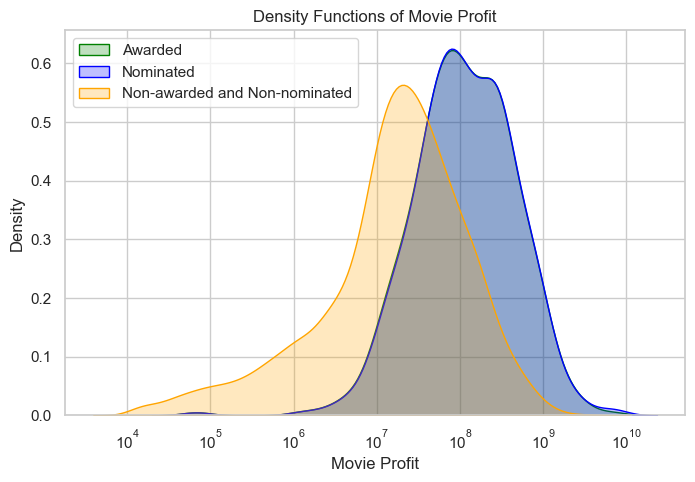

In [ ]:
plt.figure(figsize=(8, 5))
# KDE Plot for Awarded Movies
sns.kdeplot(data=df_movie_profit[df_movie_profit['Was_awarded'] == 'Awarded'], x='Inflation_adjusted_profit', fill=True, label='Awarded', color='green', log_scale=True)
# KDE Plot for Nominated Movies
sns.kdeplot(data=df_movie_profit[df_movie_profit['Was_nominated'] == 'Nominated'], x='Inflation_adjusted_profit', fill=True, label='Nominated', color='blue',log_scale=True)
# KDE Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie_profit[(df_movie_profit['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.kdeplot(data=non_awarded_nominated_movies, x='Inflation_adjusted_profit', fill=True, label='Non-awarded and Non-nominated', color='orange' , log_scale=True)

# Set plot title and labels
plt.title('Density Functions of Movie Profit', fontsize=12)
plt.xlabel('Movie Profit')
plt.ylabel('Density')
plt.legend( loc = 'upper left') 



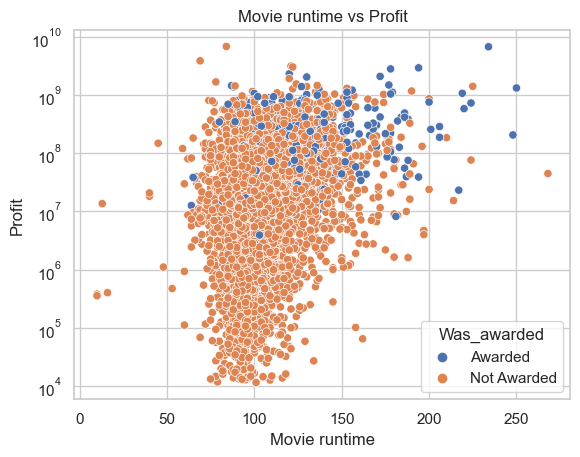

In [ ]:
sns.scatterplot(data=df_movie_profit, x='Movie_runtime', y='Inflation_adjusted_profit', hue='Was_awarded')
plt.title('Movie runtime vs Profit')
plt.xlabel('Movie runtime')
plt.yscale('log') 
plt.ylabel('Profit')
plt.show()

## 4) What is the relationship between ratings and profit

We can observe that awarded movies have significantly higher profits and movie ratings.

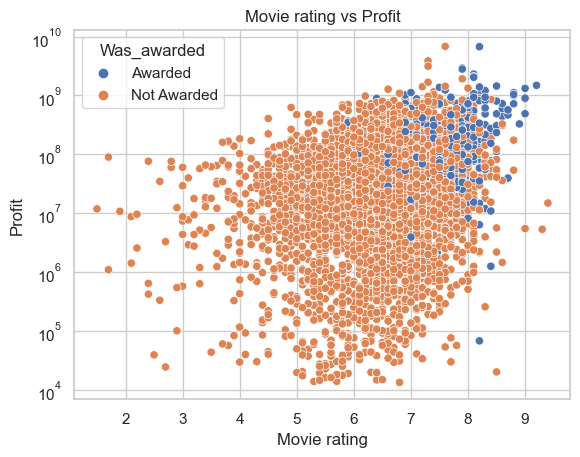

In [ ]:
sns.scatterplot(data=df_movie_profit, x='averageRating', y='Inflation_adjusted_profit', hue='Was_awarded')
plt.title('Movie rating vs Profit')
plt.xlabel('Movie rating')
plt.yscale('log') 
plt.ylabel('Profit')
plt.show()

In [ ]:
mod1 = smf.ols(formula='Inflation_adjusted_profit ~ averageRating ', data=df_movie)
res1 = mod1.fit()
print(res1.summary())

                                OLS Regression Results                               
Dep. Variable:     Inflation_adjusted_profit   R-squared:                       0.013
Model:                                   OLS   Adj. R-squared:                  0.013
Method:                        Least Squares   F-statistic:                     301.1
Date:                       Thu, 16 Nov 2023   Prob (F-statistic):           5.05e-67
Time:                               17:20:03   Log-Likelihood:            -4.6585e+05
No. Observations:                      23348   AIC:                         9.317e+05
Df Residuals:                          23346   BIC:                         9.317e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------